In [64]:
%matplotlib inline
from niwidgets import NiftiWidget
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
from numpy import fft


#signalfile = 'brainweb_sim_image_1.nii'
signalfile = '../../innovate_uk_data/11_final.nii.gz'
biasfile = '../../innovate_uk_data/11_rf_field.nii.gz'
truenoisefile = '../../innovate_uk_data/11_no_bias_with_noise.nii.gz'


In [2]:
# #input_filename = 'brainweb_rf_field_A.nii'
# my_widget = NiftiWidget(input_filename)
# my_widget.nifti_plotter()


In [3]:
signal = nib.load(signalfile)
signal.set_data_dtype(float)
signaldata = signal.get_fdata()
signaldata[signaldata == 0] = 1e-12
logsignal = nib.Nifti1Image(np.log(signaldata), signal.affine, signal.header)
NiftiWidget(logsignal).nifti_plotter()
#NiftiWidget(signal).nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=85, continuous_update=False, description='x', max=170), IntSlider(value=…

In [4]:
bias = nib.load(biasfile)
bias.set_data_dtype(float)
biasdata = bias.get_fdata()
biasdata[biasdata == 0] = 1e-12
logbias = nib.Nifti1Image(np.log(biasdata), bias.affine, bias.header)
NiftiWidget(logbias).nifti_plotter()
#NiftiWidget(signal).nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=85, continuous_update=False, description='x', max=170), IntSlider(value=…

In [5]:
truenoise = nib.load(truenoisefile)
truenoise.set_data_dtype(float)
truenoisedata = truenoise.get_fdata()
truenoisedata[truenoisedata == 0] = 1e-12
logtruenoise = nib.Nifti1Image(np.log(truenoisedata), truenoise.affine, truenoise.header)
NiftiWidget(logtruenoise).nifti_plotter()
#NiftiWidget(signal).nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=85, continuous_update=False, description='x', max=170), IntSlider(value=…

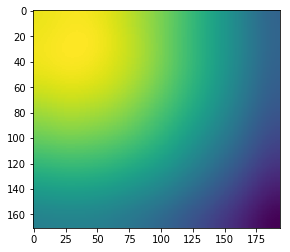

In [53]:
signaldata_ax = signaldata[:,:,150]
plt.imshow(signaldata_ax)
biasdata_ax = biasdata[:,:,150]
plt.imshow(biasdata_ax)

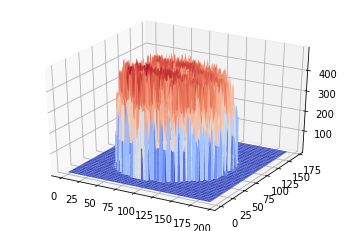

In [54]:
(x, y) = np.meshgrid(np.arange(signaldata_ax.shape[1]), np.arange(signaldata_ax.shape[0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, signaldata_ax, cmap=plt.cm.coolwarm)

In [55]:
ipv.figure()
m = ipv.plot_mesh(x, y, np.log(signaldata_ax), wireframe=False)
ipv.squarelim()
ipv.show()

In [60]:
ipv.figure()
(x, y) = np.meshgrid(np.arange(biasdata_ax.shape[0]), np.arange(biasdata_ax.shape[1]))
m = ipv.plot_mesh(x, y, 100*np.log(biasdata_ax))
ipv.squarelim()
ipv.show()